In [1]:
import numpy as np

from lamp import *
from lamp.models import *
from lamp.utils import *

## Linear Regression

In [2]:
a = 8.74
sigma = 5

xtrain = np.linspace(0, 2, 100).reshape(-1, 1)
ytrain = xtrain * a + np.random.uniform(-sigma, sigma, (100,1))


In [3]:
linreg = LinearRegression()
linreg.fit(xtrain, ytrain, nb_iter=1000, gradient_step=1e-5)

In [4]:
w = linreg.linear._parameters[0][0]
print(f"Predicted linear coefficient: {w}")
print(f"MSE Loss : {linreg.loss_list[-1]}")

Predicted linear coefficient: 8.834359671383465
MSE Loss : 8.174055872413234


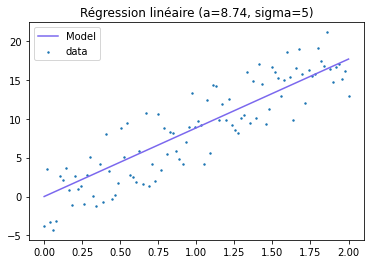

In [5]:
plt.figure()
plt.title(f"Régression linéaire (a={a}, sigma={sigma})")
plt.scatter(xtrain.reshape(1, -1), ytrain.reshape(1, -1), s=2, label="data")
toPlot = [w * x[0] for x in xtrain]
plt.plot(xtrain.reshape(1, -1)[0], toPlot, color="mediumslateblue", label="Model")
plt.legend()
plt.show()


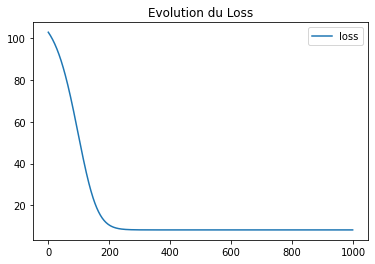

In [6]:
plt.figure()
plt.title("Evolution du Loss")
plt.plot(linreg.loss_list, label="loss")
plt.legend()

plt.show()

## Non-Linear

In [2]:
datax, datay = gen_arti(data_type=1)
datay = np.where(datay == -1, 0, 1)

In [3]:
nonlin = NonLinear()
nonlin.fit(datax, datay, hidden_size=20, nb_iter=1000, gradient_step=1e-3)
yhat = nonlin.predict(datax)
nonlin.score(datax, datay)



0.996

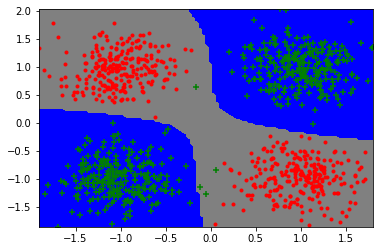

In [4]:
plot_frontiere(datax, nonlin.predict, step=100)
plot_data(datax, datay.flatten())
plt.show()

## Multi-Class

In [15]:
datax, datay = load_usps("../data/USPS_train.txt")
testx, testy = load_usps("../data/USPS_test.txt")

datax, datay = get_usps(list(range(10)), datax, datay)
testx, testy = get_usps(list(range(10)), testx, testy)

onehot = np.zeros((datay.size, 10))
onehot[np.arange(datay.size), datay] = 1


In [16]:
batch_size, input_size = datax.shape
output_size = 10
hidden_size = 100

In [50]:
mc = MultiClass()
mc.fit(datax, onehot, hidden_size, nb_iter=100, gradient_step=1e-2)

In [54]:
def confusion_matrix(yhat, datay, n_classes=10):
    C = np.zeros((n_classes, n_classes))

    for i in range(yhat.size):
        C[yhat[i], datay[i]] += 1

    C /= C.sum(axis=1,keepdims=1)

    plt.imshow(C)
    plt.xticks(range(n_classes))
    plt.yticks(range(n_classes))
    plt.colorbar()
    plt.show()

score: 0.881909203127143


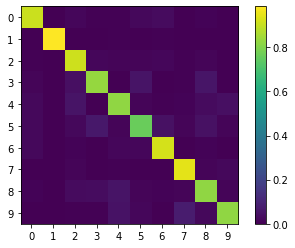

In [55]:
yhat = mc.predict(datax)
print(f"score: {mc.score(datax, datay)}")
confusion_matrix(yhat, datay)

score: 0.8276033881415047


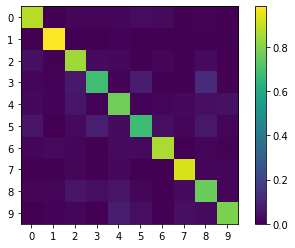

In [56]:
yhat = mc.predict(testx)
print(f"score: {mc.score(testx, testy)}")
confusion_matrix(yhat, testy)